# <font color = blue> Credit EDA Case Study</font>

## General imports and display settings

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# As the no. of columns and rows are high, setting the max columns and rows value as below for better readability
pd.set_option("display.max_columns", 150) 
pd.set_option("display.max_rows", 150)

In [4]:
# Float number formatting - Suppress exponential display of Float number
pd.set_option('display.float_format', '{:.3f}'.format)

## User defined function

In [5]:
# function to determine the upper and lower fence/limit of a numerical column
def find_limits(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print('lower limit: ',lower,'upper limit: ', upper)

## Current Loan application

## Task 1: Data Understanding
## <font color = 'indigo'> Sub task 1.1: Import the file

In [6]:
#Load the given application_data csv file
df_app = pd.read_csv('application_data.csv')
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

## <font color = 'indigo'> Sub task 1.2: Check the structure of the data

In [7]:
# Find the number of rows and columns
df_app.shape

(307511, 122)

In [8]:
# Check the column-wise info of the dataframe
df_app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [9]:
# Number of columns with null values
print("Number of columns with null values: ", (df_app.isnull().sum()>0).sum())

Number of columns with null values:  67


In [10]:
# Display the descriptive statistics of all the numerical columns
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,307511.000,307511.000,104582.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307509.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,134133.000,306851.000,246546.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,159080.000,306490.000,306490.000,306490.000,306490.000,307510.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,-4986.120,-2994.202,12.061,1.000,0.820,0.199,0.998,0.281,0.057,2.153,2.052,2.032,12.063,0.015,0.051,0.041,0.078,0.230,0.180,0.502,0.514,0.511,0.117,0.088,0.978,0.752,0.045,0.079,0.150,0.226,0.232,0.066,0.101,0.107,0.009,0.028,0.114,0.088,0.977,0.760,0.043,0.074,0.145,0.222,0.228,0.065,0.106,0.106,0.008,0.027,0.118,0.088,0.978,0.756,0.045,0.078,0.149,0.226,0.232,0.067,0.102,0.109,0.009,0.028,0.103,1.422,0.143,1.405,0.100,-962.859,0.000,0.710,0.000,0.015,0.088,0.000,0.081,0.004,0.000,0.004,0.000,0.004,0.003,0.001,0.010,0.000,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,237123.146,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,3522.886,1509.450,11.945,0.002,0.384,0.400,0.043,0.450,0.231,0.911,0.509,0.503,3.266,0.122,0.220,0.197,0.268,0.421,0.384,0.211,0.191,0.195,

In [11]:
# Display the descriptive statistics of all the object columns
df_app.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


## Task 2: Data Quality Check and Missing values

In [12]:
# checking columns with missing values
missing_data = df_app.isnull().sum()[df_app.isnull().sum()>0]
missing_data

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

## <font color = 'indigo'> Sub task 2.1 Find the percentage of missing values for all the columns

In [13]:
df_missing = pd.DataFrame(missing_data, columns=['Null_count']).reset_index()

pd.DataFrame.rename(df_missing,columns={'index': 'Column_Name'}, inplace =True)

df_missing['Percent_Null']= df_missing.Null_count*100/df_app.shape[0]

df_missing.sort_values(by='Percent_Null', ascending=False)

,Column_Name,Null_count,Percent_Null
41,COMMONAREA_MEDI,214865,69.872
13,COMMONAREA_AVG,214865,69.872
27,COMMONAREA_MODE,214865,69.872
49,NONLIVINGAPARTMENTS_MEDI,213514,69.433
35,NONLIVINGAPARTMENTS_MODE,213514,69.433
21,NONLIVINGAPARTMENTS_AVG,213514,69.433
51,FONDKAPREMONT_MODE,210295,68.386
33,LIVINGAPARTMENTS_MODE,210199,68.355
47,LIVINGAPARTMENTS_MEDI,210199,68.355
19,LIVINGAPARTMENTS_AVG,210199,68.355


## <font color = 'indigo'> Sub task 2.2: Remove columns with high missing percentage (>=50%)

In [14]:
# creating list of those columns with missing values 50% or more
delete_list = df_missing[df_missing.Percent_Null >= 50].Column_Name.tolist()

In [15]:
# total number of columns with missing values 50% or more
len(delete_list)

41

In [16]:
# dropping the columns with missing values 50% or more
df_app_new = df_app.drop(delete_list,axis =1)

# Number of columns with null values - After removal of columns with null values >=50%
print("Number of columns with null values (After removing columns with high missing percentage):", (df_app_new.isnull().sum()>0).sum())

# Total number of rows and columns- After removal of columns with null values >=50%
print ("Total number of rows and columns (After removing columns with high missing percentage) :", df_app_new.shape)


Number of columns with null values (After removing columns with high missing percentage): 26
Total number of rows and columns (After removing columns with high missing percentage) : (307511, 81)


## <font color = 'indigo'> Sub task 2.3: Suggestions for Imputation of Null values in columns (around 13% or so)

In [17]:
df_missing[df_missing.Percent_Null <= 15]

,Column_Name,Null_count,Percent_Null
0,AMT_ANNUITY,12,0.004
1,AMT_GOODS_PRICE,278,0.090
2,NAME_TYPE_SUITE,1292,0.420
5,CNT_FAM_MEMBERS,2,0.001
7,EXT_SOURCE_2,660,0.215
56,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332
57,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332
58,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332
59,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332
60,DAYS_LAST_PHONE_CHANGE,1,0.000


### <font color = green> Categorical Features

In [18]:
# NAME_TYPE_SUITE has 0.42% Null values

In [19]:
df_app_new.NAME_TYPE_SUITE.value_counts(normalize=True,dropna=False).mul(100)

Unaccompanied     80.819
Family            13.056
Spouse, partner    3.697
Children           1.062
Other_B            0.576
NaN                0.420
Other_A            0.282
Group of people    0.088
Name: NAME_TYPE_SUITE, dtype: float64

**Suggestion:** 
- NAME_TYPE_SUITE

null value imputation can be done with **Mode** of the column i.e. 'Unaccompanied'. Also, this category represents Clients who were already not accompanied by anyone

## <font color = green> Numerical Features

In [20]:
# 3 columns - AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK---> Null values = 13.50 %

In [21]:
df_app_new[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK
count,265992.000,265992.000,265992.000
mean,0.006,0.007,0.034
std,0.084,0.111,0.205
min,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,0.000,0.000,0.000
75%,0.000,0.000,0.000
max,4.000,9.000,8.000


**Suggestion:** 
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK

**Mean** can be used to carry null imputation as median is '0' for all three variables.

In [22]:
# AMT_GOODS_PRICE Null Values 0.09 %

In [23]:
find_limits(df_app_new.AMT_GOODS_PRICE)

lower limit:  -423000.0 upper limit:  1341000.0


In [24]:
df_app_new.AMT_GOODS_PRICE.describe()

count    307233.000
mean     538396.207
std      369446.461
min       40500.000
25%      238500.000
50%      450000.000
75%      679500.000
max     4050000.000
Name: AMT_GOODS_PRICE, dtype: float64

**Suggestion:** 
- AMT_GOODS_PRICE

**Median** can be used instead of mean as there are more number of Outliers and mean would have been impacted by the outliers.

### For convenience of reference further, renaming all the columns to lower case

In [25]:
df_app_new.columns= df_app_new.columns.str.lower()
df_app_new.columns

Index(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price', 'name_type_suite',
       'name_income_type', 'name_education_type', 'name_family_status',
       'name_housing_type', 'region_population_relative', 'days_birth',
       'days_employed', 'days_registration', 'days_id_publish', 'flag_mobil',
       'flag_emp_phone', 'flag_work_phone', 'flag_cont_mobile', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members',
       'region_rating_client', 'region_rating_client_w_city',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'reg_region_not_live_region', 'reg_region_not_work_region',
       'live_region_not_work_region', 'reg_city_not_live_city',
       'reg_city_not_work_city', 'live_city_not_work_city',
       'organization_type', 'ext_source_2', 'ext_source_3',
       'years_beginexpluatation_avg', 'floor

## <font color = 'indigo'> Subtask 2.4: Fixing Data types

In [26]:
# Convert the below Float type columns to Int64 as these columns hold only integer values
# Int64 is chosen to accommodate Nan values in these columns

df_app_new['cnt_fam_members'] = df_app_new['cnt_fam_members'].astype('Int64')
df_app_new['def_30_cnt_social_circle'] = df_app_new['def_30_cnt_social_circle'].astype('Int64')
df_app_new['obs_60_cnt_social_circle'] = df_app_new['obs_60_cnt_social_circle'].astype('Int64')
df_app_new['def_60_cnt_social_circle'] = df_app_new['def_60_cnt_social_circle'].astype('Int64')
df_app_new['days_last_phone_change'] = df_app_new['days_last_phone_change'].astype('Int64')

In [27]:
df_app_new.select_dtypes(include=['Int64']).columns

Index(['sk_id_curr', 'target', 'cnt_children', 'days_birth', 'days_employed',
       'days_id_publish', 'flag_mobil', 'flag_emp_phone', 'flag_work_phone',
       'flag_cont_mobile', 'flag_phone', 'flag_email', 'cnt_fam_members',
       'region_rating_client', 'region_rating_client_w_city',
       'hour_appr_process_start', 'reg_region_not_live_region',
       'reg_region_not_work_region', 'live_region_not_work_region',
       'reg_city_not_live_city', 'reg_city_not_work_city',
       'live_city_not_work_city', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'days_last_phone_change', 'flag_document_2', 'flag_document_3',
       'flag_document_4', 'flag_document_5', 'flag_document_6',
       'flag_document_7', 'flag_document_8', 'flag_document_9',
       'flag_document_10', 'flag_document_11', 'flag_document_12',
       'flag_document_13', 'flag_document_14', 'flag_document_15',
       'flag_document_16', 'flag_document_17', 'flag_documen

In [28]:
# Create new variable 'years_employed' - convert negative value of days_employed into years

In [29]:
df_app_new.years_employed = abs(df_app_new.days_employed)/365

df_app_new.years_employed.describe()

count   307511.000
mean       185.547
std        382.038
min          0.000
25%          2.556
50%          6.079
75%         15.636
max       1000.666
Name: days_employed, dtype: float64

In [30]:
# Create new variable 'years_id_publish' - Convert negative value of days_id_publish into years

In [31]:
df_app_new.years_id_publish = abs(df_app_new.days_id_publish)/365

df_app_new.years_id_publish.describe()

count   307511.000
mean         8.203
std          4.135
min          0.000
25%          4.712
50%          8.915
75%         11.778
max         19.718
Name: days_id_publish, dtype: float64

In [32]:
# Create new variable 'age_in_years'- Convert negative value of days_birth into years

In [33]:
df_app_new.age_in_years = abs(df_app_new.days_birth)/365

df_app_new.age_in_years.describe()

count   307511.000
mean        43.937
std         11.956
min         20.518
25%         34.008
50%         43.151
75%         53.923
max         69.121
Name: days_birth, dtype: float64

## <font color = 'indigo'> Sub task 2.5: Check for Outliers

Identify Outliers and perform analysis for the chosen 5 numeric variables

In [34]:
num_cols_for_analysis = ['cnt_children', 'amt_income_total','amt_credit','amt_req_credit_bureau_hour','def_60_cnt_social_circle']

In [35]:
df_app_new[num_cols_for_analysis].describe()

,cnt_children,amt_income_total,amt_credit,amt_req_credit_bureau_hour,def_60_cnt_social_circle
count,307511.000,307511.000,307511.000,265992.000,306490.000
mean,0.417,168797.919,599026.000,0.006,0.100
std,0.722,237123.146,402490.777,0.084,0.362
min,0.000,25650.000,45000.000,0.000,0.000
25%,0.000,112500.000,270000.000,0.000,0.000
50%,0.000,147150.000,513531.000,0.000,0.000
75%,1.000,202500.000,808650.000,0.000,0.000
max,19.000,117000000.000,4050000.000,4.000,24.000


In [36]:
# Print the upper and lower limits of the chosen numeric variables to help identify outliers
for col in num_cols_for_analysis:
    print(col,'-> ',end='')
    find_limits(df_app_new[col])

cnt_children -> lower limit:  -1.5 upper limit:  2.5
amt_income_total -> lower limit:  -22500.0 upper limit:  337500.0
amt_credit -> lower limit:  -537975.0 upper limit:  1616625.0
amt_req_credit_bureau_hour -> lower limit:  0.0 upper limit:  0.0
def_60_cnt_social_circle -> lower limit:  0.0 upper limit:  0.0


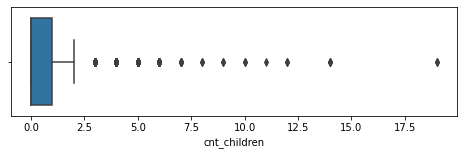

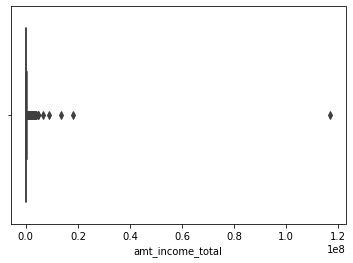

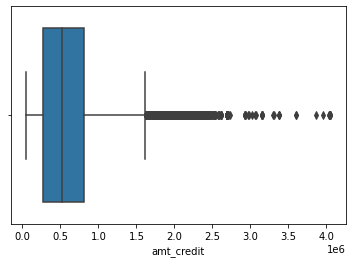

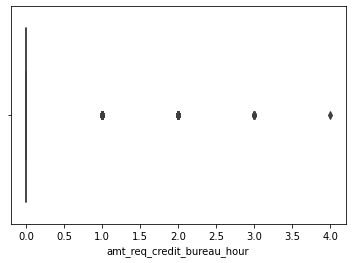

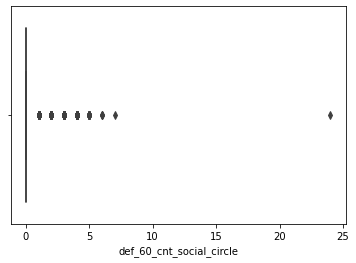

In [37]:
plt.figure(figsize=[8,2])
for column in df_app_new[num_cols_for_analysis]:
    sns.boxplot(data=df_app_new,x=column)
    plt.show()

**Observation:**

1. **cnt_children** - 75% of the Clients have only 1 children. The outliers exist beyond 2 and goes upto 19. There are couple of Clients with 19 children and shows name_family_status as "Sigle/Not married". So, its better to validate such data showing the Clients having 10 or more children to assess the integrity of the personal data (KYC) shared.

2. **amt_income_total** - There are many outliers here as well who are beyond the upper fence/limit of 330K and its quite normal to have Clients with higher income. There are 3 clients with super high income of more than 10 million. Out of which, 1 client holds the most highest income of 117 million and he is in the defaulters list. 

3. **amt_credit** - There are many outliers here as well who are beyond the upper fence/limit of 1.6 million and its quite normal to have Clients with higher loan credit. But many of those Clients holding credit more than this upper limit are also in the defaulters list.

4. **amt_req_credit_bureau_hour**- If the number of enquiries to Credit Bureau about the client one hour before application is higher, bank may tread with caution considering the multiple enquiries in a short span of time, which shows a behaviour of seeking excessive credit. While 99% of Clients do not have any enquiries at all, there are countable number of Clients having 2 to 4 enquiries within an hour. Few of them are also in the defaulters list.

5. **def_60_cnt_social_circle** - DPD of 30, 60 or 90 will have negative impact on the credit report. While 99% of Clients do not have zero counts, there are countable number of Clients having this count ranging from 1 to 24. Few of them are also in the defaulters list.


## <font color = 'indigo'> Subtask 2.6: Binning of Continuous variables

### Age

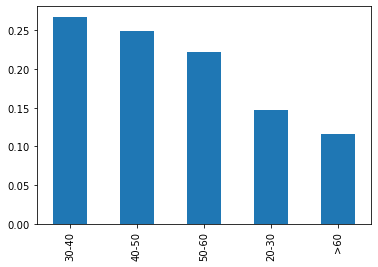

In [38]:
df_app_new['age_bins']=pd.cut(df_app_new.age_in_years, bins= [20, 30, 40, 50, 60, 70], labels=['20-30','30-40','40-50','50-60','>60'])

df_app_new.age_bins.value_counts(normalize = True).plot.bar()
plt.show()

**Observation:** The maximum applications are from age group 30-40. Though every age group has comparable applications. 

### Total income

In [39]:
df_app_new['amt_income_total'].describe()

count      307511.000
mean       168797.919
std        237123.146
min         25650.000
25%        112500.000
50%        147150.000
75%        202500.000
max     117000000.000
Name: amt_income_total, dtype: float64

**Binning of Total Income (Annual)**

25000 - 100000 = L(low income group)

100000-150000 = M(medium income group)

150000 - 200000 = H(high income group)

200000-500000 = VH(Very high income group)

500000-120000000 = SH(Super high income group)

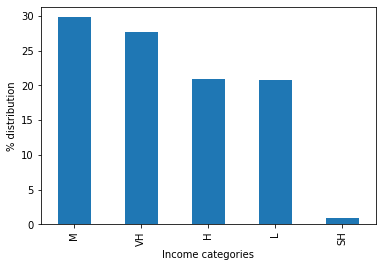

In [40]:
df_app_new['income_bins'] = pd.cut(df_app_new['amt_income_total'], bins = [25000,100000,150000,200000,500000,120000000], labels = ['L','M','H','VH','SH'])

df_app_new.income_bins.value_counts(normalize = True).mul(100).plot.bar()
plt.ylabel ('% distribution')
plt.xlabel('Income categories')
plt.show()

**Observation:**

The maximum applications are from medium income group (100K to 150K). Though other income groups like Very high, High and Low do also have comparable applications 

# Task 3: Data Analysis

## <font color = 'indigo'> Subtask 3.1: Check the imbalance percentage

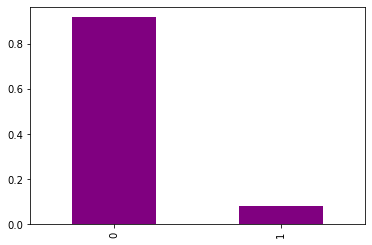

In [41]:
# check imbalance
df_app_new.target.value_counts(normalize = True).plot.bar(color='purple')
plt.show()

In [42]:
# percent imbalance
100*df_app_new.target.value_counts(normalize = True)

0   91.927
1    8.073
Name: target, dtype: float64

**Observation:** The above result shows that 91.93 % data is for '0' TARGET value. Thus it is an unbalanced data.

## <font color = 'indigo'> Subtask 3.2: Divide the data into two data sets

In [43]:
# Data set with Target=1
defaulters = df_app_new[df_app_new.target ==1]

# Reset default index
defaulters.reset_index(inplace = True, drop = True)

defaulters.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age_bins,income_bins
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.263,0.139,0.972,0.083,0.972,0.083,0.972,0.083,0.015,No,2.000,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,20-30,VH
1,100031,1,Cash loans,F,N,Y,0,112500.000,979992.000,27076.500,702000.000,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018,-18724,-2628,-6573.000,-1827,1,1,0,1,0,0,Cooking staff,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548,0.191,0.973,0.042,0.973,0.042,0.973,0.042,0.009,Yes,10.000,1,10,0,-161,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000,0.000,0.000,0.000,2.000,2.000,50-60,M
2,100047,1,Cash loans,M,N,Y,0,202500.000,1193580.000,35028.000,855000.000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025,-17482,-1262,-1182.000,-1029,1,1,0,1,0,0,Laborers,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.307,0.320,0.996,0.250,0.996,0.250,0.996,0.250,0.146,No,0.000,0,0,0,-1075,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,2.000,0.000,4.000,40-50,VH
3,100049,1,Cash loans,F,N,N,0,135000.000,288873.000,16258.500,238500.000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007,-13384,-3597,-45.000,-4409,1,1,1,1,1,0,Sales staff,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674,0.400,nan,nan,nan,nan,nan,nan,nan,NaN,1.000,0,1,0,-1480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,2.000,30-40,M
4,100096,1,Cash loans,F,N,Y,0,81000.000,252000.000,14593.500,252000.000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.029,-24794,365243,-5391.000,-4199,1,0,0,1,0,0,NaN,2,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.024,0.721,nan,nan,nan,nan,nan,nan,nan,NaN,1.000,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,>60,L


In [44]:
# Data set with Target=0
non_defaulters = df_app_new[df_app_new.target ==0]

# Reset default index
non_defaulters.reset_index(inplace = True, drop = True)

non_defaulters.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age_bins,income_bins
0,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622,nan,0.985,0.292,0.985,0.292,0.985,0.292,0.071,No,1.000,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,40-50,VH
1,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,0,0,0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,50-60,L
2,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,297000.000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008,-19005,-3039,-9833.000,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.000,0,2,0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,50-60,M
3,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,513000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.029,-19932,-3038,-4311.000,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.323,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,0,0,0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,50-60,M
4,100008,0,Cash loans,M,N,Y,0,99000.000,490495.500,27517.500,454500.000,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.036,-16941,-1588,-4970.000,-477,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354,0.621,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,0,0,0,-2536,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,1.000,1.000,40-50,L


## <font color = 'indigo'> Sub task 3.3: Univariate Analysis

### <font color = 'green'> Categorical variables

In [45]:
# Gender Analysis

In [46]:
print("Defaulters:\n", defaulters.code_gender.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.code_gender.value_counts(normalize=True).mul(100))

Defaulters:
 F   57.080
M   42.920
Name: code_gender, dtype: float64

Non Defaulters:
 F     66.603
M     33.395
XNA    0.001
Name: code_gender, dtype: float64


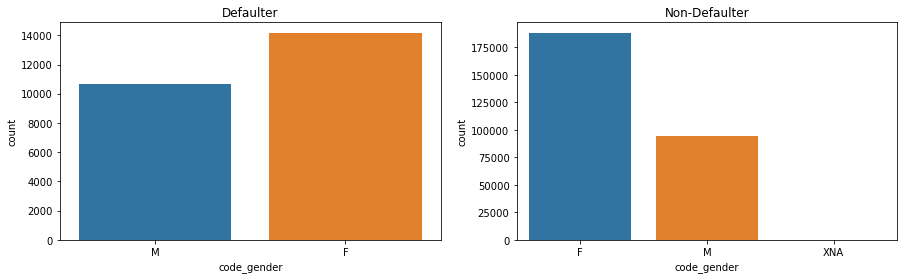

In [47]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.code_gender)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.code_gender)
plt.show()

**Observation:**  In general, the number of Female Clients are very high compared to Male. However, the percentage of Male Clients in the defaulters list is higher compared to that of Non-Defaulters list. 

In [48]:
# Owning a car

In [49]:
print("Defaulters:\n", defaulters.flag_own_car.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.flag_own_car.value_counts(normalize=True).mul(100))

Defaulters:
 N   69.482
Y   30.518
Name: flag_own_car, dtype: float64

Non Defaulters:
 N   65.682
Y   34.318
Name: flag_own_car, dtype: float64


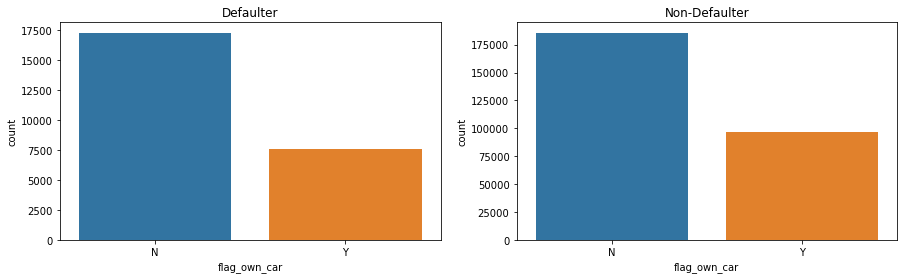

In [50]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.flag_own_car)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.flag_own_car)
plt.show()

**Observation:** Applicant owning a car tend to default less.

In [51]:
# Type of income

In [52]:
print("Defaulters:\n", defaulters.name_income_type.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.name_income_type.value_counts(normalize=True).mul(100))

Defaulters:
 Working                61.325
Commercial associate   21.591
Pensioner              12.012
State servant           5.031
Unemployed              0.032
Maternity leave         0.008
Name: name_income_type, dtype: float64

Non Defaulters:
 Working                50.781
Commercial associate   23.438
Pensioner              18.529
State servant           7.236
Student                 0.006
Unemployed              0.005
Businessman             0.004
Maternity leave         0.001
Name: name_income_type, dtype: float64


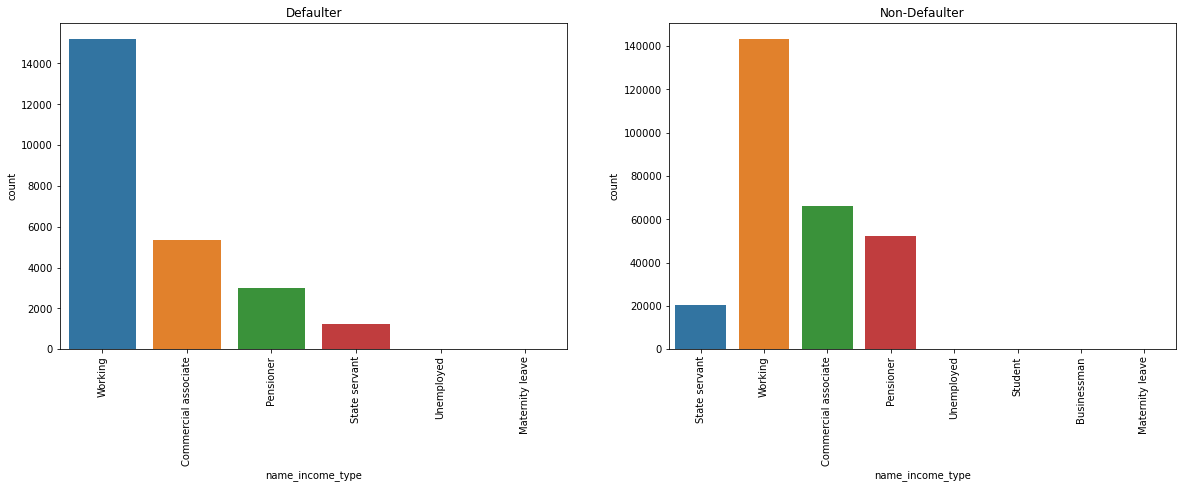

In [53]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.name_income_type)
plt.xticks(rotation =90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.name_income_type)
plt.xticks(rotation =90)
plt.show()

**Observation:** 
1. Working Clients tend to default more
2. None of the students are in the defaulters list
3. Commercial associate, State servant and Pensioner are having comparatively better payment records

In [54]:
# Applicant Education type

In [55]:
print("Defaulters:\n", defaulters.name_education_type.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.name_education_type.value_counts(normalize=True).mul(100))

Defaulters:
 Secondary / secondary special   78.647
Higher education                16.149
Incomplete higher                3.513
Lower secondary                  1.680
Academic degree                  0.012
Name: name_education_type, dtype: float64

Non Defaulters:
 Secondary / secondary special   70.349
Higher education                25.065
Incomplete higher                3.327
Lower secondary                  1.202
Academic degree                  0.057
Name: name_education_type, dtype: float64


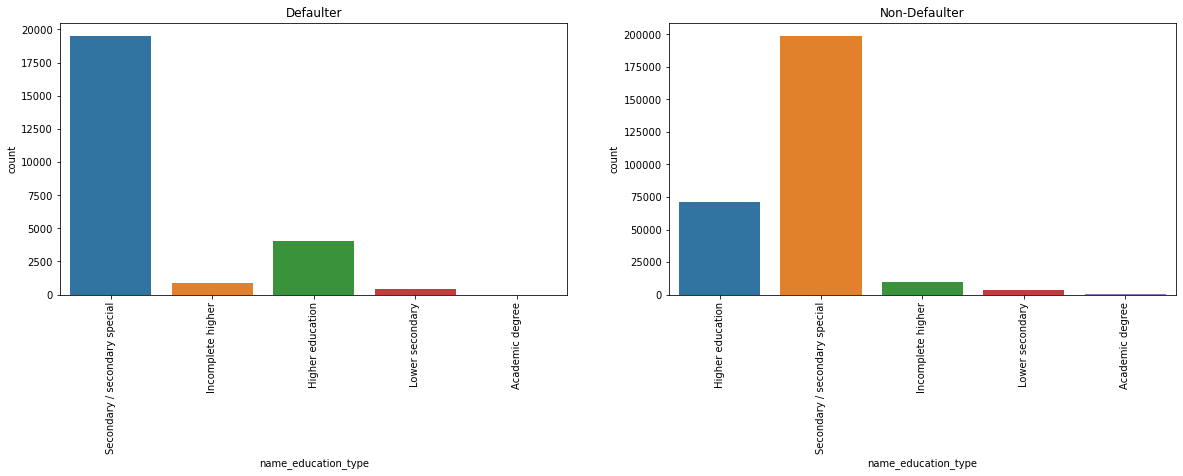

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.name_education_type)
plt.xticks(rotation =90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.name_education_type)
plt.xticks(rotation =90)
plt.show()

**Observation:** 
1. Secondary / secondary special education has more defaulters
2. Clients with Higher education tend to default less

In [57]:
# Family status

In [58]:
print("Defaulters:\n", defaulters.name_family_status.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.name_family_status.value_counts(normalize=True).mul(100))

Defaulters:
 Married                59.819
Single / not married   17.954
Civil marriage         11.927
Separated               6.526
Widow                   3.774
Name: name_family_status, dtype: float64

Non Defaulters:
 Married                64.235
Single / not married   14.499
Civil marriage          9.485
Separated               6.421
Widow                   5.360
Unknown                 0.001
Name: name_family_status, dtype: float64


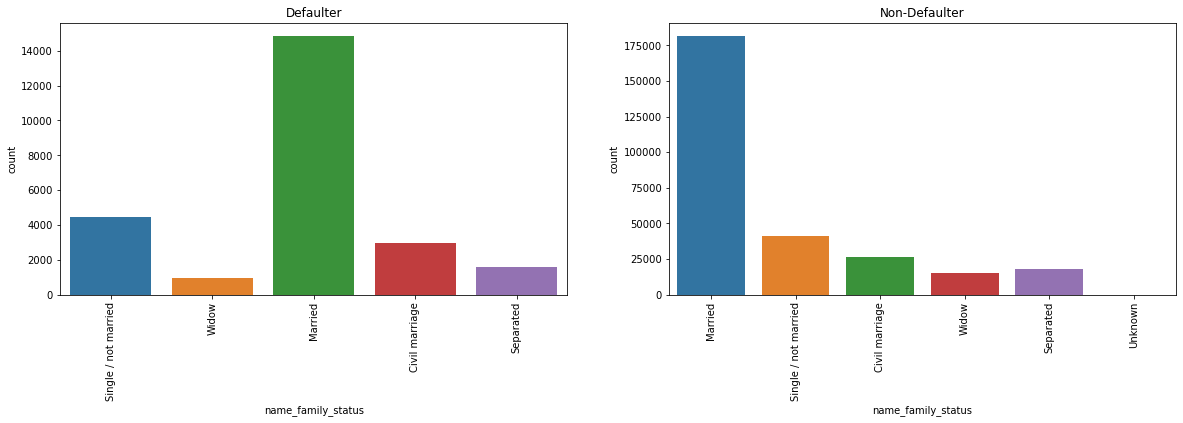

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.name_family_status)
plt.xticks(rotation =90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.name_family_status)
plt.xticks(rotation =90)
plt.show()

**Observation**: Single/not married and civil marriage categories comparatively defaults more.

In [60]:
# Housing type

In [61]:
print("Defaulters:\n", defaulters.name_housing_type.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.name_housing_type.value_counts(normalize=True).mul(100))

Defaulters:
 House / apartment     85.688
With parents           6.993
Municipal apartment    3.847
Rented apartment       2.421
Office apartment       0.693
Co-op apartment        0.359
Name: name_housing_type, dtype: float64

Non Defaulters:
 House / apartment     89.002
With parents           4.636
Municipal apartment    3.618
Rented apartment       1.514
Office apartment       0.865
Co-op apartment        0.365
Name: name_housing_type, dtype: float64


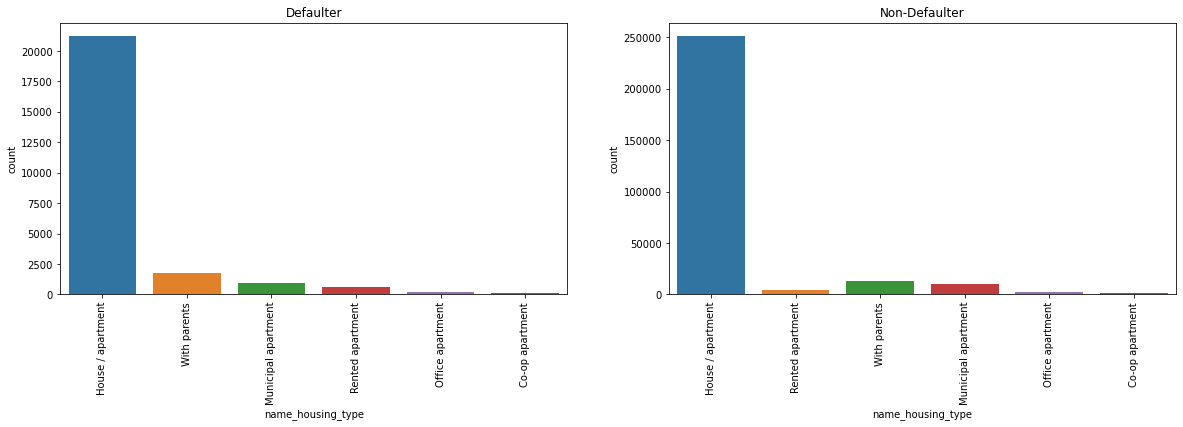

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.name_housing_type)
plt.xticks(rotation =90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.name_housing_type)
plt.xticks(rotation =90)
plt.show()

**Observation:** Housing type has no impact on being defaulter.

In [63]:
# Occupation type

In [64]:
print("Defaulters:\n", defaulters.occupation_type.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.occupation_type.value_counts(normalize=True).mul(100))

Defaulters:
 Laborers                31.477
Sales staff             16.671
Drivers                 11.360
Core staff               9.371
Managers                 7.160
Security staff           3.893
High skill tech staff    3.780
Cooking staff            3.348
Medicine staff           3.084
Accountants              2.556
Cleaning staff           2.410
Low-skill Laborers       1.936
Private service staff    0.944
Waiters/barmen staff     0.820
Secretaries              0.496
Realty agents            0.318
HR staff                 0.194
IT staff                 0.183
Name: occupation_type, dtype: float64

Non Defaulters:
 Laborers                25.626
Sales staff             15.064
Core staff              13.414
Managers                10.408
Drivers                  8.566
High skill tech staff    5.545
Accountants              4.850
Medicine staff           4.136
Security staff           3.115
Cooking staff            2.765
Cleaning staff           2.184
Private service staff    1.286
L

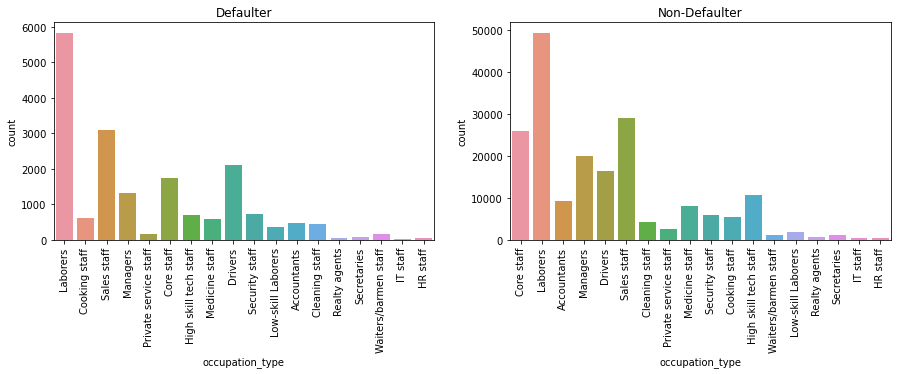

In [65]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.occupation_type)
plt.xticks(rotation =90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.occupation_type)
plt.xticks(rotation =90)
plt.show()

**Observation:**
1. Laborers and Drivers tend to default more
2. Core staffs and Managers tend to default less

In [66]:
# Live_city _not_work_city

In [67]:
print("Defaulters:\n", defaulters.live_city_not_work_city.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.live_city_not_work_city.value_counts(normalize=True).mul(100))

Defaulters:
 0   77.833
1   22.167
Name: live_city_not_work_city, dtype: float64

Non Defaulters:
 0   82.414
1   17.586
Name: live_city_not_work_city, dtype: float64


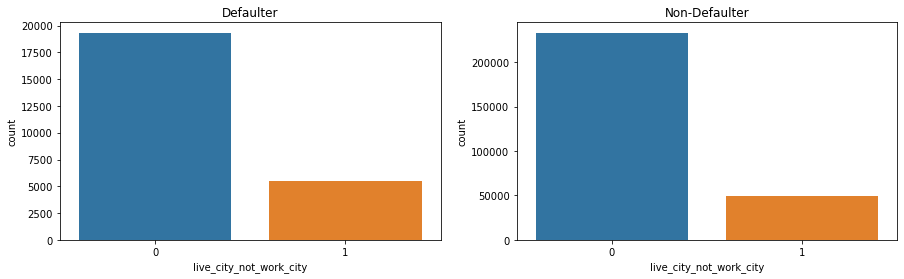

In [68]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.live_city_not_work_city)

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.live_city_not_work_city)

plt.show()

**Observation:** If the applicants living and working city is not same then there are slightly more chance of being defaulter.

In [69]:
# Applicant's Organization type

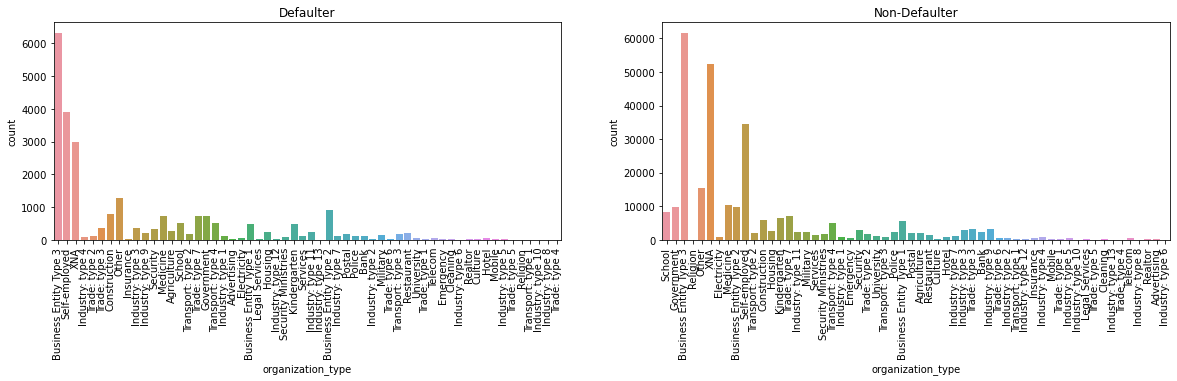

In [70]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.organization_type)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.organization_type)
plt.xticks(rotation = 90)
plt.show()

**Observation:** The organisation type has no impact on being defaulter.

In [71]:
# Age bin

In [72]:
print("Defaulters:\n", defaulters.age_bins.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.age_bins.value_counts(normalize=True).mul(100))

Defaulters:
 30-40   31.774
40-50   23.589
20-30   20.777
50-60   16.806
>60      7.053
Name: age_bins, dtype: float64

Non Defaulters:
 30-40   26.326
40-50   25.005
50-60   22.601
20-30   14.102
>60     11.967
Name: age_bins, dtype: float64


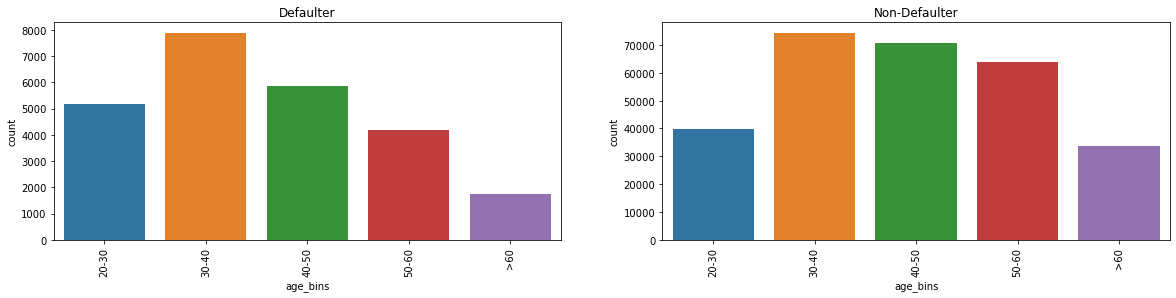

In [73]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.age_bins)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.age_bins)
plt.xticks(rotation = 90)
plt.show()

**Observation:** There are comparatively more defaulters in age group 20-30.

In [74]:
# Income bin

In [75]:
print("Defaulters:\n", defaulters.income_bins.value_counts(normalize=True).mul(100))
print("\nNon Defaulters:\n", non_defaulters.income_bins.value_counts(normalize=True).mul(100))

Defaulters:
 M    31.799
VH   24.685
H    21.881
L    21.047
SH    0.588
Name: income_bins, dtype: float64

Non Defaulters:
 M    29.608
VH   27.976
H    20.827
L    20.685
SH    0.904
Name: income_bins, dtype: float64


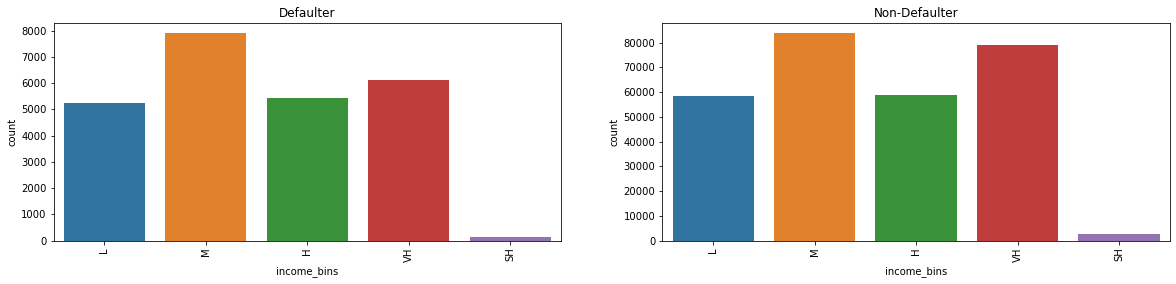

In [76]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot(defaulters.income_bins)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot(non_defaulters.income_bins)
plt.xticks(rotation = 90)
plt.show()

**Observation:** Medium income group (100K to 150K) tend to default more

### <font color = 'green'> Continuous variables

In [77]:
# Amount credit

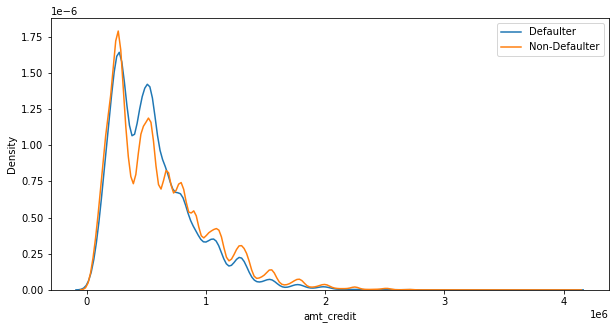

In [78]:
plt.figure(figsize=(10,5))
sns.distplot(defaulters.amt_credit, hist= False, label = 'Defaulter')
sns.distplot(non_defaulters.amt_credit, hist= False, label = 'Non-Defaulter')
plt.legend()
plt.show()

**Observation:** 
1. Majority of the loan amounts are upto 1 million. 
2. Around 500K credit amount number of defaulters are higher.

In [79]:
# Amount Annuity

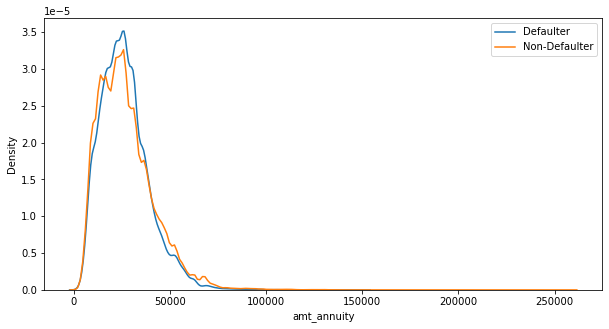

In [80]:
plt.figure(figsize=(10,5))
sns.distplot(defaulters.amt_annuity, hist= False, label = 'Defaulter')
sns.distplot(non_defaulters.amt_annuity, hist= False, label = 'Non-Defaulter')
plt.legend()
plt.show()

**Observation:** There are slightly more defaulters than non-defaulters with annuity amount around 30K to 40K.

In [81]:
# Days employed

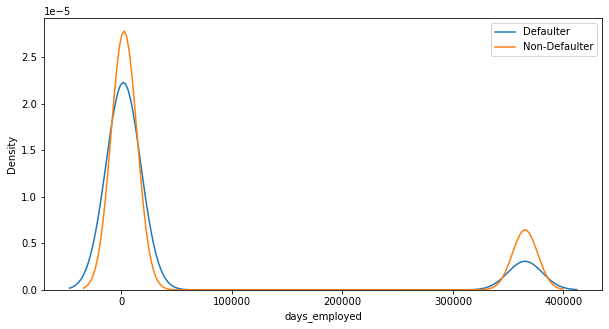

In [82]:
plt.figure(figsize=(10,5))
sns.distplot(abs(defaulters.days_employed), hist= False, label = 'Defaulter')
sns.distplot(abs(non_defaulters.days_employed), hist= False, label = 'Non-Defaulter')
plt.legend()
plt.show()

**Observation:** 
1. There are some outliers in this column.
2. Both defaulters and non defaulters days employed data is normally distributed with equal mean.

In [83]:
# The number of past days where identity document changed by applicant

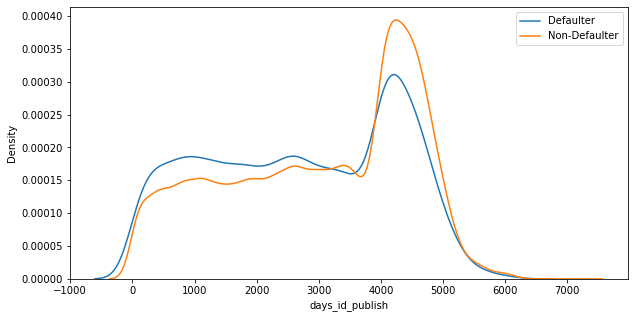

In [84]:
plt.figure(figsize=(10,5))
sns.distplot(abs(defaulters.days_id_publish), hist= False, label = 'Defaulter')
sns.distplot(abs(non_defaulters.days_id_publish), hist= False, label = 'Non-Defaulter')
plt.legend()
plt.show()

**Observation:** In the region of the identity document was changed in 3000 or less days, there are slightly more defaulters than the non-defaulters.

In [85]:
# def_30_cnt_social_circle

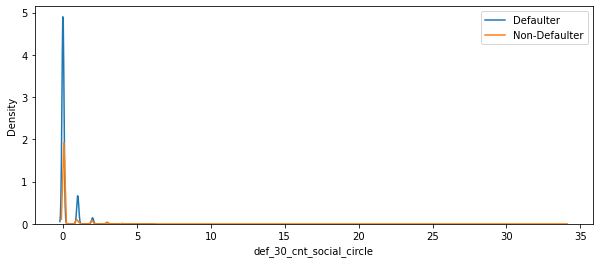

In [86]:
plt.figure(figsize=(10,4))
sns.distplot(defaulters.def_30_cnt_social_circle.astype(float), hist= False, label = 'Defaulter')
sns.distplot(non_defaulters.def_30_cnt_social_circle.astype(float), hist= False, label = 'Non-Defaulter')
plt.legend()
plt.show()

**Observation:** In the defaulters social circle, relatively higher defaulters observed than for non defaulter.

In [87]:
# Days last phone change

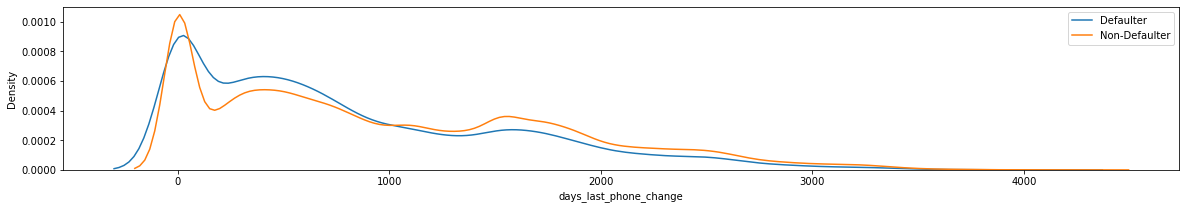

In [88]:
plt.figure(figsize=(20,3))
sns.distplot(abs(defaulters.days_last_phone_change.astype(float)), hist= False, label = 'Defaulter')
sns.distplot(abs(non_defaulters.days_last_phone_change.astype(float)), hist= False, label = 'Non-Defaulter')
plt.legend()
plt.show()

**Observation:** As per the chart if the phone number has changed by the applicant within 100 to 800 days before application, then tendency of default is more.

## <font color = 'indigo'> Sub task 3.4: Bivariate Analysis

### <font color = 'green'> Categorical - Categorical variables

In [89]:
# Gender - Income bins

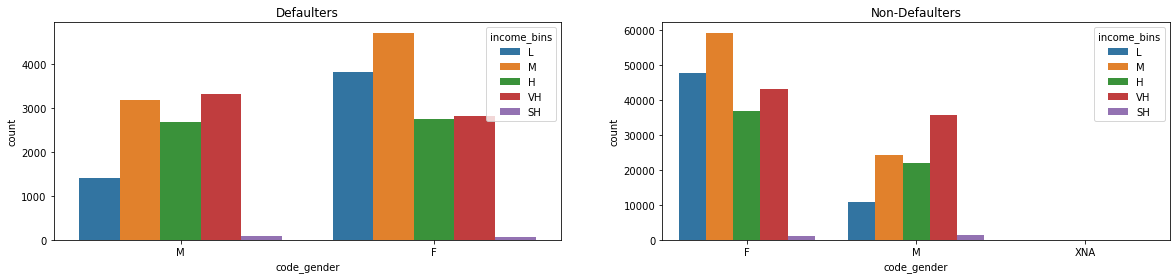

In [90]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x = 'code_gender', hue = 'income_bins',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x = 'code_gender',hue = 'income_bins', data = non_defaulters)
plt.show()

**Observation:** 
1. Female category: Though Low & medium income group are having more defaulters but these groups also has more number 
   of applications.  
2. Male Category: In this category Low, Medium & high income groups have more number of defaulters.

In [91]:
# Gender & Income type

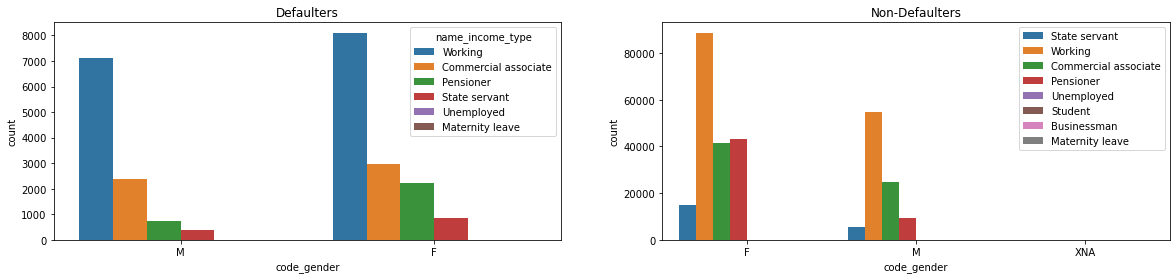

In [92]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x = 'code_gender', hue = 'name_income_type',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x = 'code_gender',hue = 'name_income_type', data = non_defaulters)
plt.legend(loc='upper right')
plt.show()

**Observation:** 
1. Male category: Working category has higher defaulters than any other category.
2. Female category: Female pensioners have better payment record.
3. Irrespective of gender, State servent & commercial associate category has better payment record.

In [93]:
# Car owning & housing type

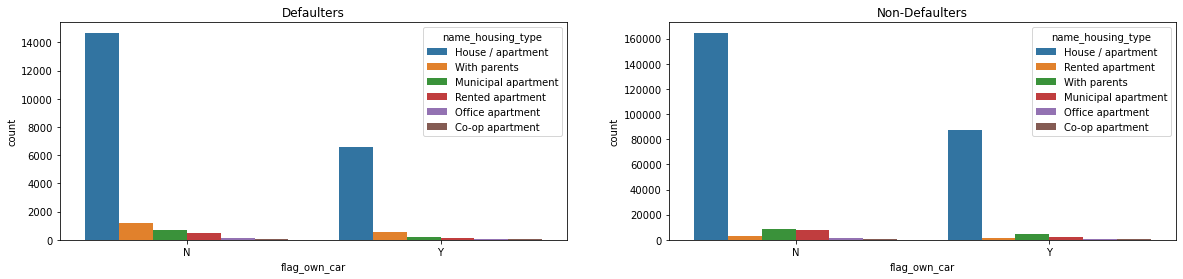

In [94]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x = 'flag_own_car', hue = 'name_housing_type',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x = 'flag_own_car',hue = 'name_housing_type', data = non_defaulters)

plt.show()

**Observation:** The applicant owning a car and lives in house/apartment tend to default less.

In [95]:
# Income bin - Education type

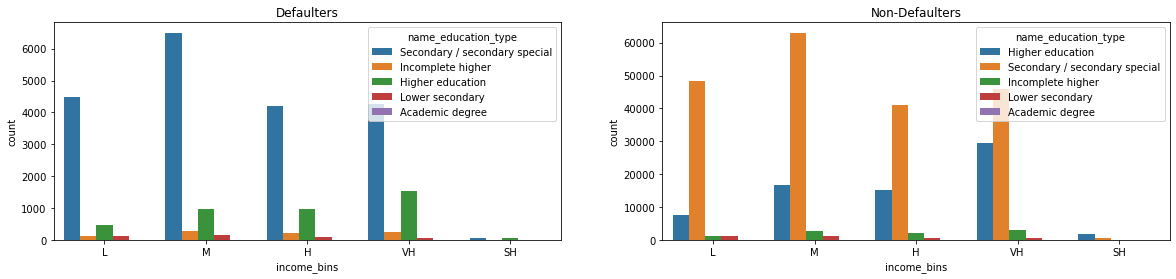

In [96]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x = 'income_bins', hue = 'name_education_type',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x = 'income_bins',hue = 'name_education_type', data = non_defaulters)

plt.show()

**Observation:** 
     Irrespective of income group applicant with higher education seems to do well.

In [97]:
# Gender - Age bin

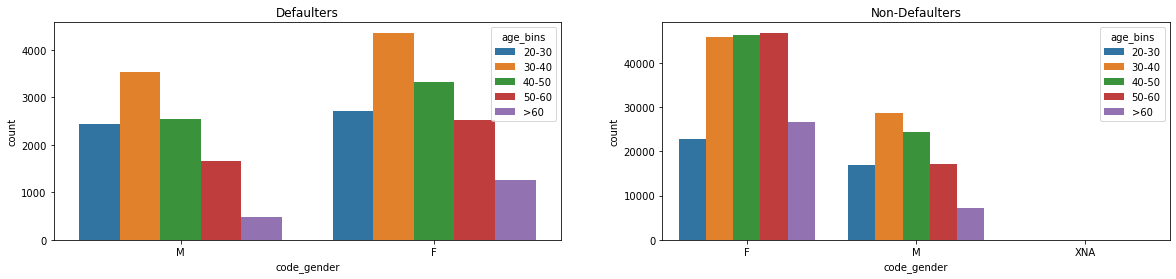

In [98]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x = 'code_gender', hue = 'age_bins',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x = 'code_gender',hue = 'age_bins', data = non_defaulters)

plt.show()

**Observation:** 
1. Female category: Only age group 20-30 seems to perform poor while other performs better.
2. Male category: Age group 40 & above perform better while 20-40 seems to have more defaulters.

### <font color = 'green'> Categorical - Continuous variables

In [99]:
# Gender - Total income

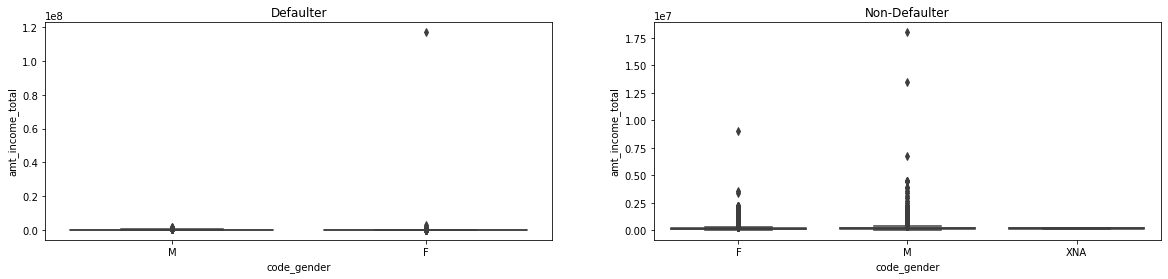

In [100]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulter')
sns.boxplot(x = 'code_gender', y = 'amt_income_total',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.boxplot(x = 'code_gender', y = 'amt_income_total',data = non_defaulters)
plt.show()

 **Observation:** There is no any noticeable difference in the total income for both male & female category. 

In [101]:
# Age_bin - credit

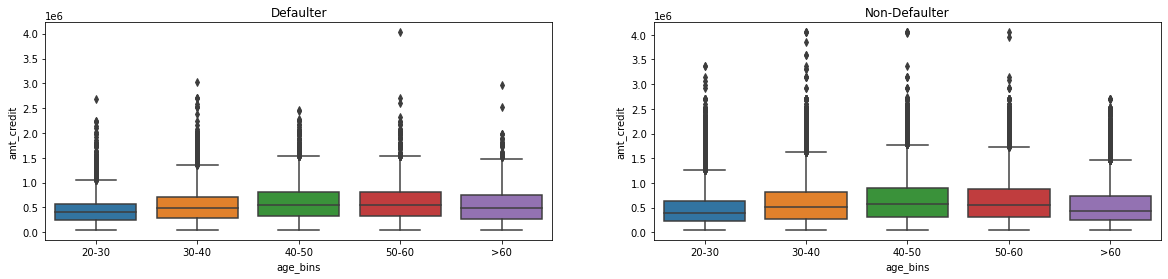

In [102]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulter')
sns.boxplot(x = 'age_bins', y = 'amt_credit',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.boxplot(x = 'age_bins', y = 'amt_credit',data = non_defaulters)
plt.show()

**Observation:** The amount credit received by age group 40 and above is higher.

In [103]:
# Age_bin - Annuity amount

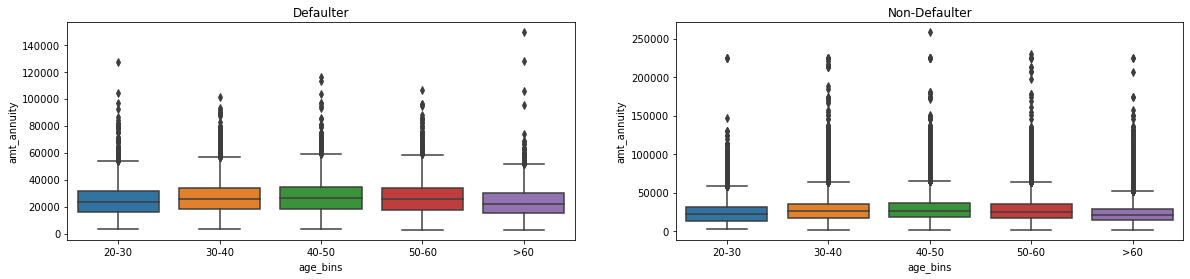

In [104]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulter')
sns.boxplot(x = 'age_bins', y = 'amt_annuity',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.boxplot(x = 'age_bins', y = 'amt_annuity',data = non_defaulters)
plt.show()

**Observation:** The amount annuity for the age group 20-30 is higher in defaulters

In [105]:
# Income bin - credit

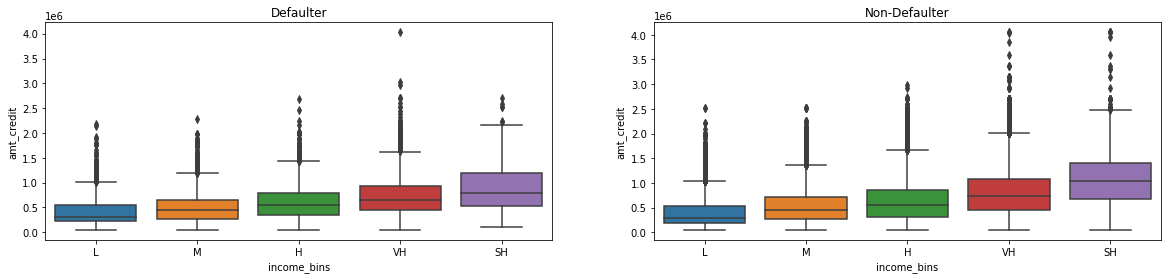

In [106]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulter')
sns.boxplot(x = 'income_bins', y = 'amt_credit',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.boxplot(x = 'income_bins', y = 'amt_credit',data = non_defaulters)
plt.show()

**Observation:** The plot shows the known fact that the higher income applicants received higher credit.

### <font color = 'green'> Continuous - Continuous variables

In [107]:
# Annuity amount - credit

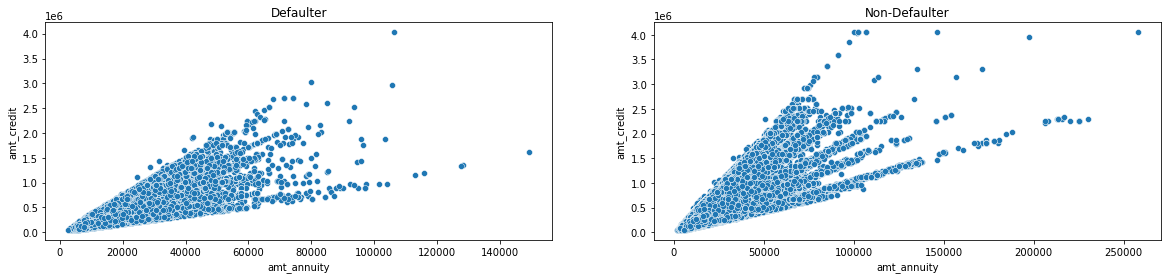

In [108]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulter')
sns.scatterplot(x = 'amt_annuity', y = 'amt_credit',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.scatterplot(x = 'amt_annuity', y = 'amt_credit',data = non_defaulters)
plt.show()

**Observation:** Most defaulters lie below annuity amount of Rs. 60000 and credit amount of 2 million rupees.

In [109]:
# Age - Credit

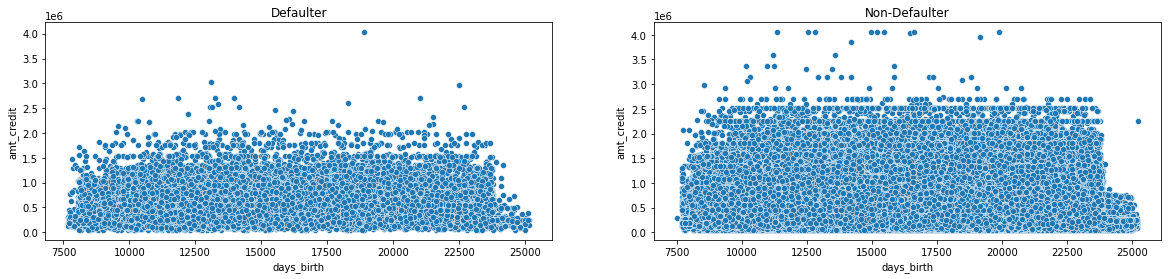

In [110]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title('Defaulter')
sns.scatterplot(x = abs(defaulters.days_birth), y = 'amt_credit',data = defaulters)

plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.scatterplot(x = abs(non_defaulters.days_birth), y = 'amt_credit',data = non_defaulters)
plt.show()

**Observation:** There is no impact of age on getting credit.

## <font color = 'indigo'> Sub task 3.4: Correlation Analysis - Numerical columns

In [111]:
# columns considered for correlation analysis
analysis_columns=['name_contract_type','code_gender','flag_own_car','flag_own_realty','cnt_children','amt_income_total','amt_credit','amt_annuity','name_income_type','name_education_type','name_family_status','name_housing_type','days_birth','days_employed','days_id_publish','flag_emp_phone','flag_cont_mobile','flag_email','occupation_type','cnt_fam_members','live_region_not_work_region','live_city_not_work_city','organization_type','obs_30_cnt_social_circle','def_30_cnt_social_circle','obs_60_cnt_social_circle','def_60_cnt_social_circle','days_last_phone_change','amt_req_credit_bureau_hour','amt_req_credit_bureau_day']

### <font color = 'green'> Correlation for Defaulter data

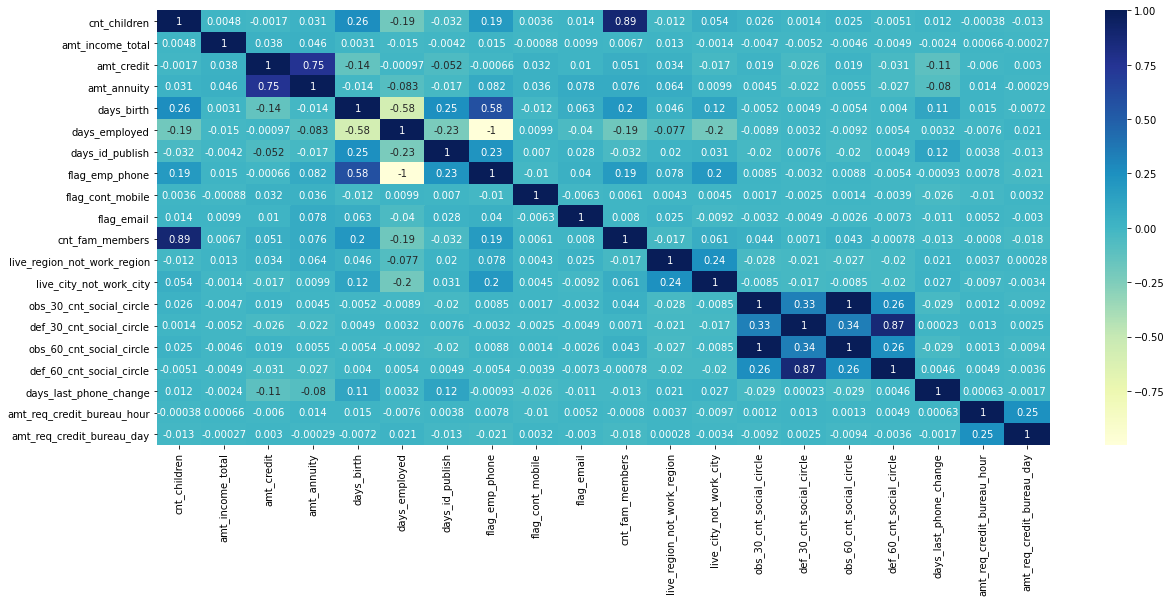

In [112]:
plt.figure(figsize=(20,8))
sns.heatmap(defaulters[analysis_columns].corr(), annot = True, cmap='YlGnBu')
plt.show()

**Observation:**
1. days_employed and flag_emp_phone have very strong negative correlation of -1
2. cnt_children and cnt_fam_members has correleation of 0.89.
3. def_30_cnt_social_circle and def_60_cnt_social_circle have correlation of 0.87.
4. amt_credit and amt_annuity have correlation 0.75
5. days_birth has correlation of +0.58 & - 0.58 with flag_emp_phone & days_employed respectively

### <font color = 'green'> Correlation for Non-Defaulter data

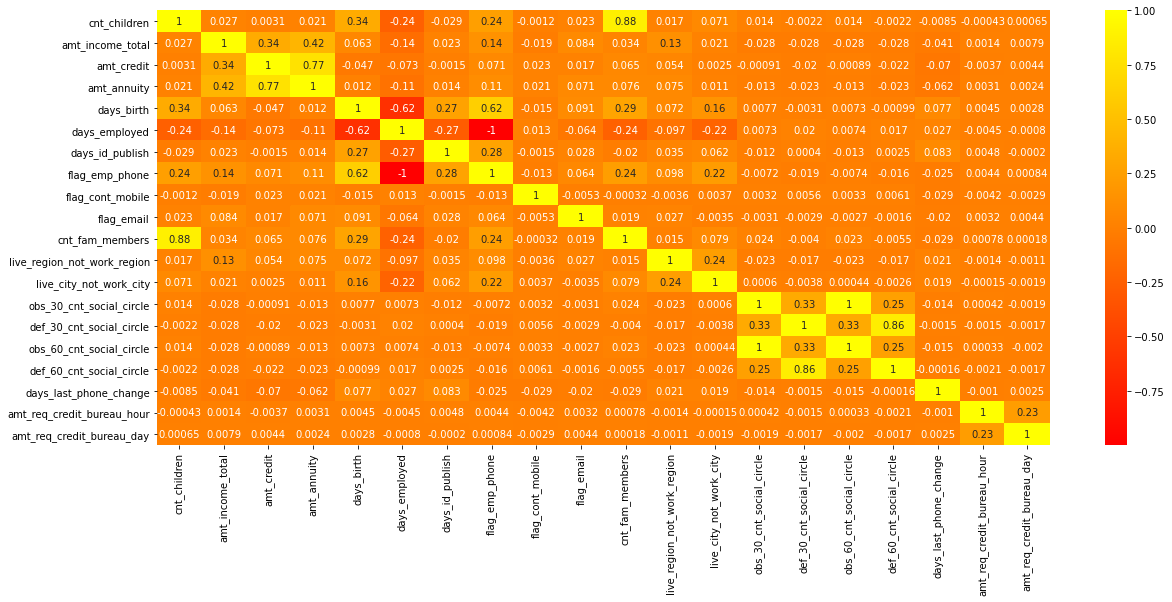

In [113]:
plt.figure(figsize=(20,8))
sns.heatmap(non_defaulters[analysis_columns].corr(), annot = True, cmap='autumn')
plt.show()

**Observation:**
1. days_employed and flag_emp_phone have very strong negative correlation of -1
2. cnt_children and cnt_fam_members has correleation of 0.88.
3. def_30_cnt_social_circle and def_60_cnt_social_circle have correlation of 0.86.
4. amt_credit and amt_annuity have correlation 0.77
5. days_birth has correlation of +0.58 & - 0.58 with flag_emp_phone & days_employed respectively

### <font color='green'> The variables with the highest correlation are the same in case of both defaulters and non defaulters

## Task 4: Data Understanding and Analysis of Previous Loan application

## <font color = 'indigo'> Sub task 4.1: Import the file

In [114]:
#Load the given application_data csv file
df_prev = pd.read_csv('previous_application.csv')
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Y,1,0.000,0.183,0.867,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest,365243.000,-42.000,300.000,-42.000,-37.000,0.000
1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,nan,607500.000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low,365243.000,-134.000,916.000,365243.000,365243.000,1.000
2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,nan,112500.000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high,365243.000,-271.000,59.000,365243.000,365243.000,1.000
3,2819243,176158,Cash loans,47041.335,450000.000,470790.000,nan,450000.000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle,365243.000,-482.000,-152.000,-182.000,-177.000,1.000
4,1784265,202054,Cash loans,31924.395,337500.000,404055.000,nan,337500.000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


## <font color = 'indigo'> Sub task 4.2: Check the structure of the data

In [115]:
# Find the number of rows and columns
df_prev.shape

(1670214, 37)

In [116]:
# Check the column-wise info of the dataframe
df_prev.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [117]:
# Number of columns with null values
print("Number of columns with null values: ", (df_prev.isnull().sum()>0).sum())

Number of columns with null values:  16


In [118]:
# Display the descriptive statistics of all the numerical columns
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.000,1670214.000,1297979.000,1670214.000,1670213.000,774370.000,1284699.000,1670214.000,1670214.000,774370.000,5951.000,5951.000,1670214.000,1670214.000,1297984.000,997149.000,997149.000,997149.000,997149.000,997149.000,997149.000
mean,1923089.135,278357.174,15955.121,175233.860,196114.021,6697.402,227847.279,12.484,0.996,0.080,0.188,0.774,-880.680,313.951,16.054,342209.855,13826.269,33767.774,76582.403,81992.344,0.333
std,532597.959,102814.824,14782.137,292779.762,318574.617,20921.495,315396.558,3.334,0.059,0.108,0.088,0.101,779.100,7127.443,14.567,88916.116,72444.870,106857.035,149647.415,153303.517,0.471
min,1000001.000,100001.000,0.000,0.000,0.000,-0.900,0.000,0.000,0.000,-0.000,0.035,0.373,-2922.000,-1.000,0.000,-2922.000,-2892.000,-2801.000,-2889.000,-2874.000,0.000
25%,1461857.250,189329.000,6321.780,18720.000,24160.500,0.000,50841.000,10.000,1.000,0.000,0.161,0.716,-1300.000,-1.000,6.000,365243.000,-1628.000,-1242.000,-1314.000,-1270.000,0.000
50%,1923110.500,278714.500,11250.000,71046.000,80541.000,1638.000,112320.000,12.000,1.000,0.052,0.189,0.835,-581.000,3.000,12.000,365243.000,-831.000,-361.000,-537.000,-499.000,0.000
75%,2384279.750,367514.000,20658.420,180360.000,216418.500,7740.000,234000.000,15.000,1.000,0.109,0.193,0.853,-280.000,82.000,24.000,365243.000,-411.000,129.000,-74.000,-44.000,1.000
max,2845382.000,456255.000,418058.145,6905160.000,6905160.000,3060045.000,6905160.000,23.000,1.000,1.000,1.000,1.000,-1.000,4000000.000,84.000,365243.000,365243.000,365243.000,365243.000,365243.000,1.000


In [119]:
# Display the descriptive statistics of all the object columns
df_prev.describe(include='object')

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


## <font color = 'indigo'> Sub task 4.3: Data Quality checks and missing values

In [120]:
# checking columns with missing values
prev_missing_data = df_prev.isnull().sum()[df_prev.isnull().sum()>0]
prev_missing_data

AMT_ANNUITY                   372235
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

### Find the percentage of missing values for all the columns

In [121]:
df_prev_missing = pd.DataFrame(prev_missing_data, columns=['Null_count']).reset_index()

pd.DataFrame.rename(df_prev_missing,columns={'index': 'Column_Name'}, inplace =True)

df_prev_missing['Percent_Null']= df_prev_missing.Null_count*100/df_prev.shape[0]

df_prev_missing.sort_values(by='Percent_Null', ascending=False)

,Column_Name,Null_count,Percent_Null
5,RATE_INTEREST_PRIMARY,1664263,99.644
6,RATE_INTEREST_PRIVILEGED,1664263,99.644
2,AMT_DOWN_PAYMENT,895844,53.636
4,RATE_DOWN_PAYMENT,895844,53.636
7,NAME_TYPE_SUITE,820405,49.120
10,DAYS_FIRST_DRAWING,673065,40.298
11,DAYS_FIRST_DUE,673065,40.298
12,DAYS_LAST_DUE_1ST_VERSION,673065,40.298
13,DAYS_LAST_DUE,673065,40.298
14,DAYS_TERMINATION,673065,40.298


### Remove columns with high missing percentage (>=50%)

In [122]:
# creating list of those columns with missing values 50% or more
prev_delete_list = df_prev_missing[df_prev_missing.Percent_Null >= 50].Column_Name.tolist()

In [123]:
# total number of columns with missing values 50% or more
len(prev_delete_list)

4

In [124]:
# dropping the columns with missing values 50% or more
df_prev_new = df_prev.drop(prev_delete_list,axis =1)

# Number of columns with null values - After removal of columns with null values >=50%
print("Number of columns with null values (After removing columns with high missing percentage):", (df_prev_new.isnull().sum()>0).sum())

# Total number of rows and columns- After removal of columns with null values >=50%
print ("Total number of rows and columns (After removing columns with high missing percentage) :", df_prev_new.shape)


Number of columns with null values (After removing columns with high missing percentage): 12
Total number of rows and columns (After removing columns with high missing percentage) : (1670214, 33)


In [125]:
# Column wise info - After removal of columns with null values >=50%
df_prev_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### For convenience of reference further, renaming all the columns to lower case

In [126]:
df_prev_new.columns= df_prev_new.columns.str.lower()
df_prev_new.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'name_cash_loan_purpose', 'name_contract_status', 'days_decision',
       'name_payment_type', 'code_reject_reason', 'name_type_suite',
       'name_client_type', 'name_goods_category', 'name_portfolio',
       'name_product_type', 'channel_type', 'sellerplace_area',
       'name_seller_industry', 'cnt_payment', 'name_yield_group',
       'product_combination', 'days_first_drawing', 'days_first_due',
       'days_last_due_1st_version', 'days_last_due', 'days_termination',
       'nflag_insured_on_approval'],
      dtype='object')

## <font color = 'indigo'> Sub task 4.4: Merging of Loan application and Previous application data frames 

In [127]:
merge_data = df_app_new.merge(df_prev_new, on='sk_id_curr', suffixes=[None,'_prev'],how = 'inner')
merge_data.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age_bins,income_bins,sk_id_prev,name_contract_type_prev,amt_annuity_prev,amt_application,amt_credit_prev,amt_goods_price_prev,weekday_appr_process_start_prev,hour_appr_process_start_prev,flag_last_appl_per_contract,nflag_last_appl_in_day,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite_prev,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.263,0.139,0.972,0.083,0.972,0.083,0.972,0.083,0.015,No,2.000,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,20-30,VH,1038818,Consumer loans,9251.775,179055.000,179055.000,179055.000,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000,low_normal,POS other with interest,365243.000,-565.000,125.000,-25.000,-17.000,0.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622,nan,0.985,0.292,0.985,0.292,0.985,0.292,0.071,No,1.000,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,40-50,VH,1810518,Cash loans,98356.995,900000.000,1035882.000,900000.000,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,low_normal,Cash X-Sell: low,365243.000,-716.000,-386.000,-536.000,-527.000,1.000
2,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622,nan,0.985,0.292,0.985,0.292,0.985,0.292,0.071,No,1.000,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,40-50,VH,2636178,Consumer loans,64567.665,337500.000,348637.500,337500.000,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Famil

In [128]:
merge_data.shape

(1413701, 115)

In [129]:
# Renaming the overlapping columns of Previous application data set
merge_data.filter(regex='_prev').columns

Index(['sk_id_prev', 'name_contract_type_prev', 'amt_annuity_prev',
       'amt_credit_prev', 'amt_goods_price_prev',
       'weekday_appr_process_start_prev', 'hour_appr_process_start_prev',
       'name_type_suite_prev'],
      dtype='object')

## <font color = 'indigo'> Sub task 4.5: Univariate Analysis

### <font color = 'green'> Categorical

In [130]:
# Cash Loan Purpose

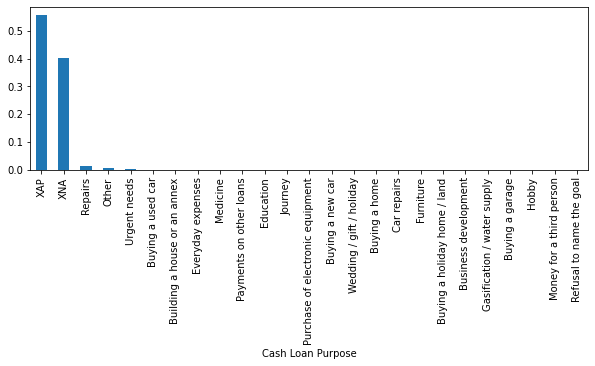

In [131]:
plt.figure(figsize = (10,3))
merge_data.name_cash_loan_purpose.value_counts(normalize=True).plot.bar()
plt.xlabel("Cash Loan Purpose")
plt.show()

#### Replacing the XAP and XNA values with Nan as those values are heavily affecting the distribution of other values as shown in the above plot

In [132]:
merge_data.name_cash_loan_purpose.replace(['XAP','XNA'],np.nan,inplace=True)
merge_data.name_client_type.replace('XNA',np.nan,inplace=True)
merge_data.code_reject_reason.replace(['XAP','XNA'],np.nan,inplace=True)


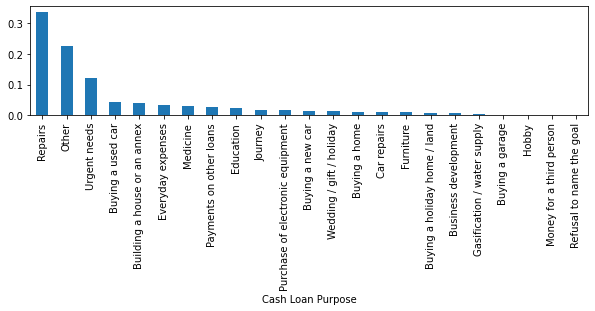

In [133]:
plt.figure(figsize = (10,2))
merge_data.name_cash_loan_purpose.value_counts(normalize=True).plot.bar()
plt.xlabel("Cash Loan Purpose")
plt.show()

**Observation**: More Cash loans are bought with the purpose of "Repair"

In [134]:
# Type of the Client (Old or New)

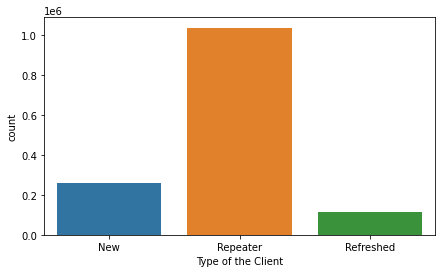

In [135]:
plt.figure(figsize = (7,4))
sns.countplot(merge_data.name_client_type)
plt.xlabel('Type of the Client')
plt.show()

**Observation**: There are more number of Repeater Clients

In [136]:
# Code Reject Reason

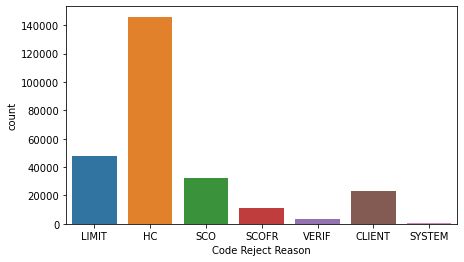

In [137]:
plt.figure(figsize = (7,4))
sns.countplot(merge_data.code_reject_reason)
plt.xlabel('Code Reject Reason')
plt.show()

**Observation**: Most of the previous loan applications have been rejected with the reason code as HC

### <font color='green'> Numerical

In [138]:
merge_data.amt_credit_prev.describe()

count   1413700.000
mean     196354.086
std      319481.251
min           0.000
25%       24880.500
50%       80595.000
75%      215640.000
max     4509688.500
Name: amt_credit_prev, dtype: float64

In [139]:
find_limits(merge_data.amt_credit_prev)

lower limit:  -261258.75 upper limit:  501779.25


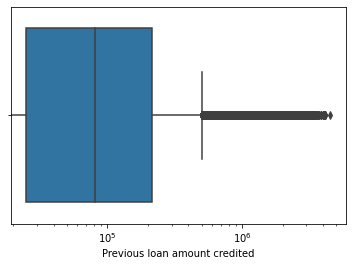

In [140]:
sns.boxplot(merge_data.amt_credit_prev)
plt.xlabel('Previous loan amount credited')
plt.xscale('log')
plt.show()

**Observation**: 75% of previous loan credit amount lies within 215K. There are more number of outliers beyond 501K and the maximum value goes up to 4.5 million. 

## <font color = 'indigo'> Sub task 4.6: Bivariate Analysis

In [141]:
# Contract Status vs Target

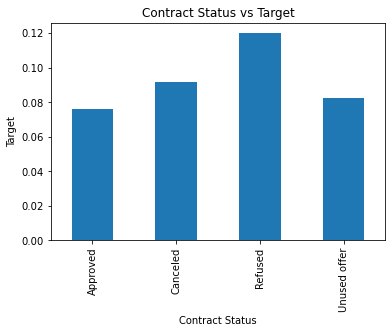

In [142]:
merge_data.groupby('name_contract_status')['target'].mean().plot.bar()
plt.xlabel('Contract Status')
plt.ylabel('Target')
plt.title('Contract Status vs Target')
plt.show()

**Observation**: Most of the Clients facing payment difficulties have got their previous loan applications 'Refused' or 'Canceled'.

In [143]:
# Distribution of Cash Loan Purpose with Contract Status

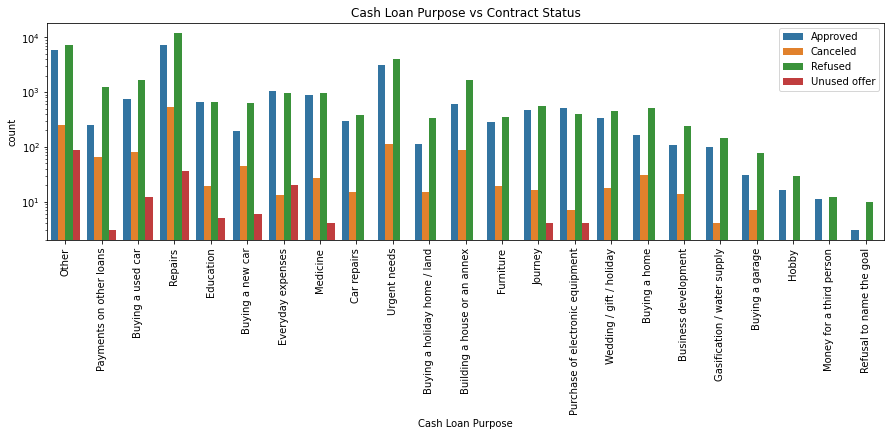

In [144]:
plt.figure(figsize = (15,4))

sns.countplot('name_cash_loan_purpose', hue = 'name_contract_status', data =merge_data)
plt.xlabel('Cash Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')

plt.legend(loc="upper right")
plt.title('Cash Loan Purpose vs Contract Status')

plt.show()

**Observation**: 

- The Clients who had applied loan with purpose as "Repairs" are mostly rejected/refused by the Bank
- Loans with purpose as 'Others' and 'Urgent needs' have higher rejections than approval
- Education has the same amount of approvals and rejections
- Purchase of electronic equipment and Everyday expenses have higher approvals than rejections

In [145]:
# Distribution of Cash Loan Purpose with Target

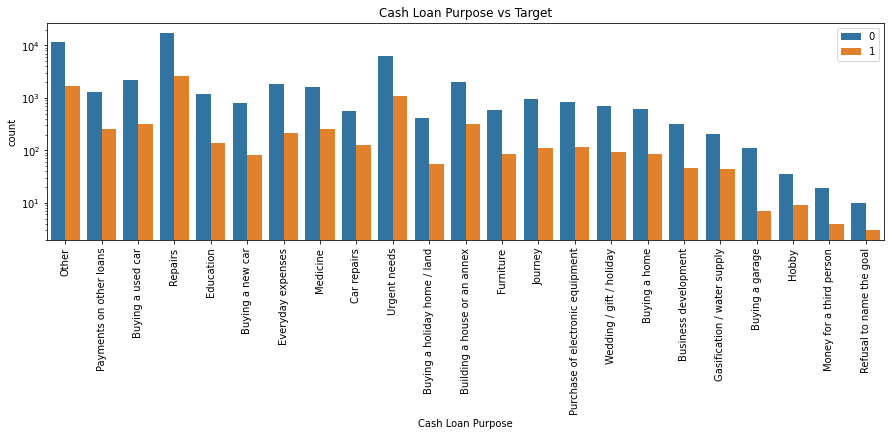

In [146]:
plt.figure(figsize = (15,4))

sns.countplot('name_cash_loan_purpose', hue = 'target', data =merge_data)
plt.xlabel('Cash Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')

plt.legend(loc="upper right")
plt.title('Cash Loan Purpose vs Target')

plt.show()

**Observation**: 

- Loans applied with "Repair" purpose are facing higher payment difficulties
- In case of "Buying a garage", the payment made on time is far higher than facing difficulties

## <font color = 'indigo'> Sub task 4.7: Multivariate Analysis

In [147]:
# Contract Status vs Client Type vs Target

In [148]:
res = pd.pivot_table(data=merge_data, index='name_contract_status',columns ='name_client_type', values='target')

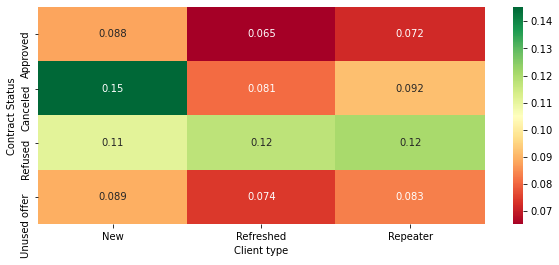

In [149]:
plt.figure(figsize=[10,4])
sns.heatmap(res, annot=True,cmap='RdYlGn')

plt.xlabel('Client type')
plt.ylabel('Contract Status')

plt.show()

**Observation**: 
- New Clients, whose loan applications have been cancelled previously while they applied for the first time, are facing more payment difficulties later on when their subsequent loan application was approved. 
- Likewise, irrespective of the type of Clients, if their previous loan application has been refused once by the bank, they same to face difficulties in payment later on.
- On the other hand, irrespective of the type of Clients, whose previous loan application has been approved are mostly not facing payment difficulties later on with their subsequent loan application as well.